In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the dataset

In [5]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


#### Choosing column 'open' for predicition

In [42]:
train = train_df.loc[:,['Open']].values
train.shape
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
train_scaled = scaler.fit_transform(train)

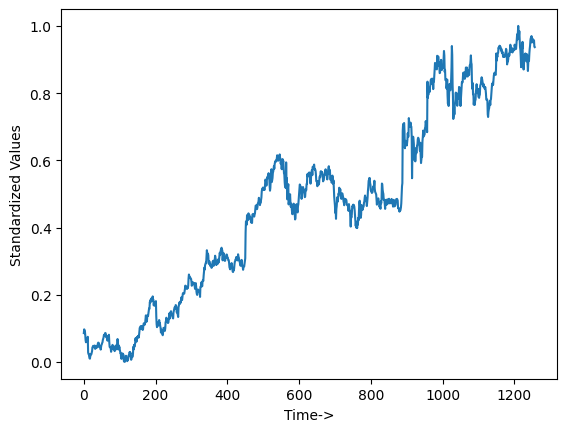

In [45]:
plt.plot(train_scaled)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

### Create data structure to train model  
Taking reference of past 60 days to predict future stock price  
x_train will have data of 60 days prior to current date and y_train will have price on current date

In [46]:
x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [47]:
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [48]:
x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

### Build model

In [49]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout

In [50]:
model = Sequential()

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)               

In [51]:
model.fit(x_train,y_train,epochs=100,batch_size=30,validation_split=0.05)

Epoch 1/100
38/38 [==============================] - 6s 52ms/step - loss: 0.5281 - val_loss: 0.0729
Epoch 2/100
38/38 [==============================] - 1s 38ms/step - loss: 0.3028 - val_loss: 0.0047
Epoch 3/100
38/38 [==============================] - 1s 37ms/step - loss: 0.2804 - val_loss: 0.0051
Epoch 4/100
38/38 [==============================] - 1s 38ms/step - loss: 0.2335 - val_loss: 0.0348
Epoch 5/100
38/38 [==============================] - 1s 36ms/step - loss: 0.1844 - val_loss: 0.0392
Epoch 6/100
38/38 [==============================] - 1s 28ms/step - loss: 0.1428 - val_loss: 0.0131
Epoch 7/100
38/38 [==============================] - 1s 28ms/step - loss: 0.1351 - val_loss: 0.0023
Epoch 8/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0970 - val_loss: 0.0088
Epoch 9/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0799 - val_loss: 0.0121
Epoch 10/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0732 - val_loss: 0.0043

### Prepare test dataset

In [52]:
data = pd.concat((train_df['Open'],test_df['Open']),axis=0)

In [53]:
test_input = data.iloc[len(data) - len(test_df) - time : ].values
test_input.shape

(80,)

In [54]:
test_input = test_input.reshape(-1,1)
test_input.shape

(80, 1)

In [55]:
test_scaled = scaler.transform(test_input)

#### Create test data set

In [56]:
x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i,0 ])
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [57]:
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [58]:
y_test = test_df.loc[:,"Open"].values

### Model Prediction

In [59]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 360ms/step


In [60]:
y_pred = scaler.inverse_transform(y_pred)

In [61]:
output = model.evaluate(x=x_test,y=y_test)

1/1 [==============================] - 0s 369ms/step - loss: 650798.5000


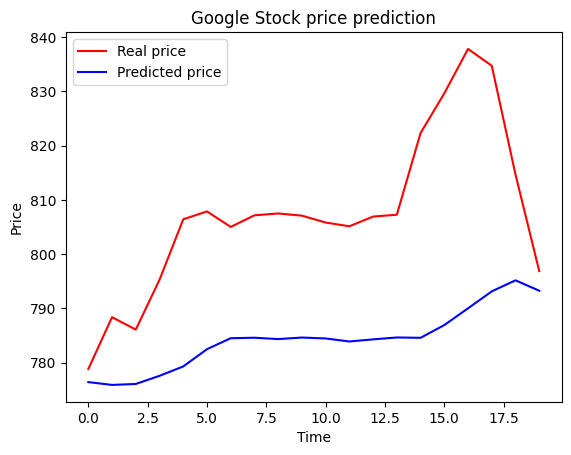

In [62]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()